# The $SO(2)$ Lie Group
## Planar Rigid Body Rotations

We will first discuss the so2 Lie algebra and Lie group. The so2 Lie algebra can be represented by all 2x2 skew symmetric matrices of the form:

In [1]:
import sympy

theta = sympy.symbols('theta')
g = sympy.Matrix([
    [0, -theta],
    [theta, 0]
])
g

Matrix([
[    0, -theta],
[theta,      0]])

The associated Lie Group $SO(2)$ can be found by taking the matrix exponential of the Lie algebra element.

In [2]:
sympy.exp(g).simplify()

Matrix([
[cos(theta), -sin(theta)],
[sin(theta),  cos(theta)]])

## A quick example of the power of Lie groups.

Try to write the best integrator for the dynamics:

$
\dot{x} = -\omega \sin{\theta} \\
\dot{y} = \omega \cos{\theta} \\
\dot{\theta} = \omega
$

With initial conditions: $x=1$, $y=0$, $\theta=0$.

This can be thought of a constant vector field on a curved manifold, which is a circle of radius 1.

### The naive approach

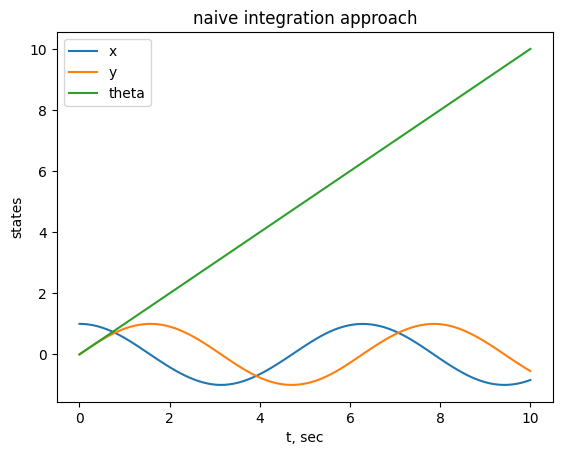

In [3]:
import scipy.integrate
import numpy as np
import matplotlib.pyplot as plt

omega = 1

def f(t, x_vect):
    x, y, theta = x_vect
    x_dot = -omega*np.sin(theta)
    y_dot = omega*np.cos(theta)
    theta_dot = omega
    return [x_dot, y_dot, theta_dot]

t = np.linspace(0, 10, 100)
x0 = [1, 0, 0]
res = scipy.integrate.solve_ivp(fun=f, t_span=[t[0], t[-1]], y0=x0, t_eval=t)
x_vect = res.y.T
plt.plot(t, x_vect, label=['x', 'y', 'theta'])
plt.legend()
plt.xlabel('t, sec')
plt.ylabel('states')
plt.title('naive integration approach');

This looks like a reasonable result, but in fact, we are already accumulating error. When integrating, we have the constraint:

$x^2 + y^2 = 1$

We are beginning to drift off the surface of the circle of radius 1 as shown by the plot below:

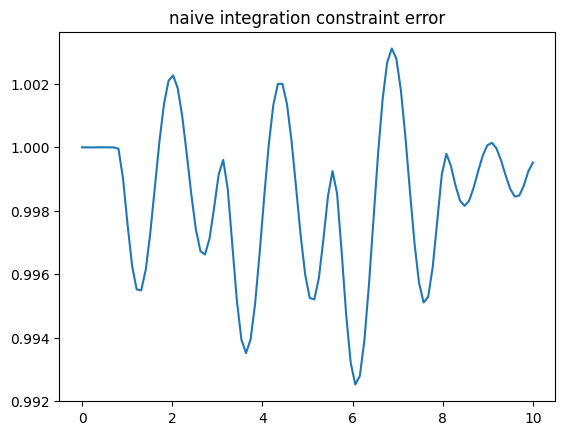

In [4]:
r = x_vect[:, 0]**2 + x_vect[:, 1]**2
plt.plot(t, r)
plt.title('naive integration constraint error');

### Lie Group approach

These dynamics can however be embedded into the $SO(2)$ Lie group for a much more accurate integration strategy.

The mathematical details are given below, but the essential idea, is to treat this as a vector field on a curved space, whose position can be described by $\theta$.

Then the equation of motion simply becomes:

$\dot{\theta} = \omega$

The coordinates can be found using the exponential map of the Lie Group.

$x = \cos{\theta}$

$y = \sin{\theta}$

#### Mathematical Details

Consider the $SO(2)$ Lie Group element G, which is a function of $\theta$:

$G = \begin{bmatrix}
\cos{\theta} && -\sin{\theta} \\
\sin{\theta} && \cos{\theta}
\end{bmatrix}$

If we take the derivative of each component of G we arrive at:

$\dot{G} = \begin{bmatrix}
-\omega \sin{\theta} && - \omega \cos{\theta} \\
\omega \cos{\theta} && \omega \sin{\theta}
\end{bmatrix}$

$\dot{G}$ can be rewritten as a multiplication of the Lie group and a Lie algebra element $\Omega$:

Here we introduce the wedge operator $[\cdot]^{\wedge}$ which transforms the scalar $\omega$ to a skew symettric 2x2 matrix, which is an element of the Lie algebra $so(2)$.

$\Omega \equiv [\omega]^{\wedge} \equiv \begin{bmatrix}
0 && -\omega \\
\omega && 0
\end{bmatrix}$

$\dot{G} = \begin{bmatrix}
\cos{\theta} && -\sin{\theta} \\
\sin{\theta} && \cos{\theta}
\end{bmatrix} \begin{bmatrix}
0 && -\omega \\
\omega && 0
\end{bmatrix} \equiv G [\omega]^{\wedge} \equiv G \Omega$



Note there is also a connection between the Lie alebra and Lie group that we can leverage.

$\exp^{[\theta]^{\wedge}} \equiv \exp^{\wedge}(\theta) = G(\theta)$


At this point, you may be wondering, if this is just a special case. However, the structure of Lie groups and Lie algebras gives us a general tools that readily applies to rigid mody motions in 2D and 3D and is therefore very useful in robotics. In fact the equation that we use here will apply to all Lie groups that we study in this class.